In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [3]:
words = open('names.txt', 'r').read().split('\n')  

In [4]:
for w in words:
    print(w)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [5]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
b

{('<s>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<e>'): 6640,
 ('<s>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<s>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<s>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<s>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<s>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<e>'): 3983,
 ('<s>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<s>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<e>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<e>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [7]:
b.items()

dict_items([(('<s>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<e>'), 6640), (('<s>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<s>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<s>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<s>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<s>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<e>'), 3983), (('<s>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<s>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<e>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [8]:
sorted(b.items(), key = lambda kv:-kv[1])

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)


In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [11]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [12]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1



In [13]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

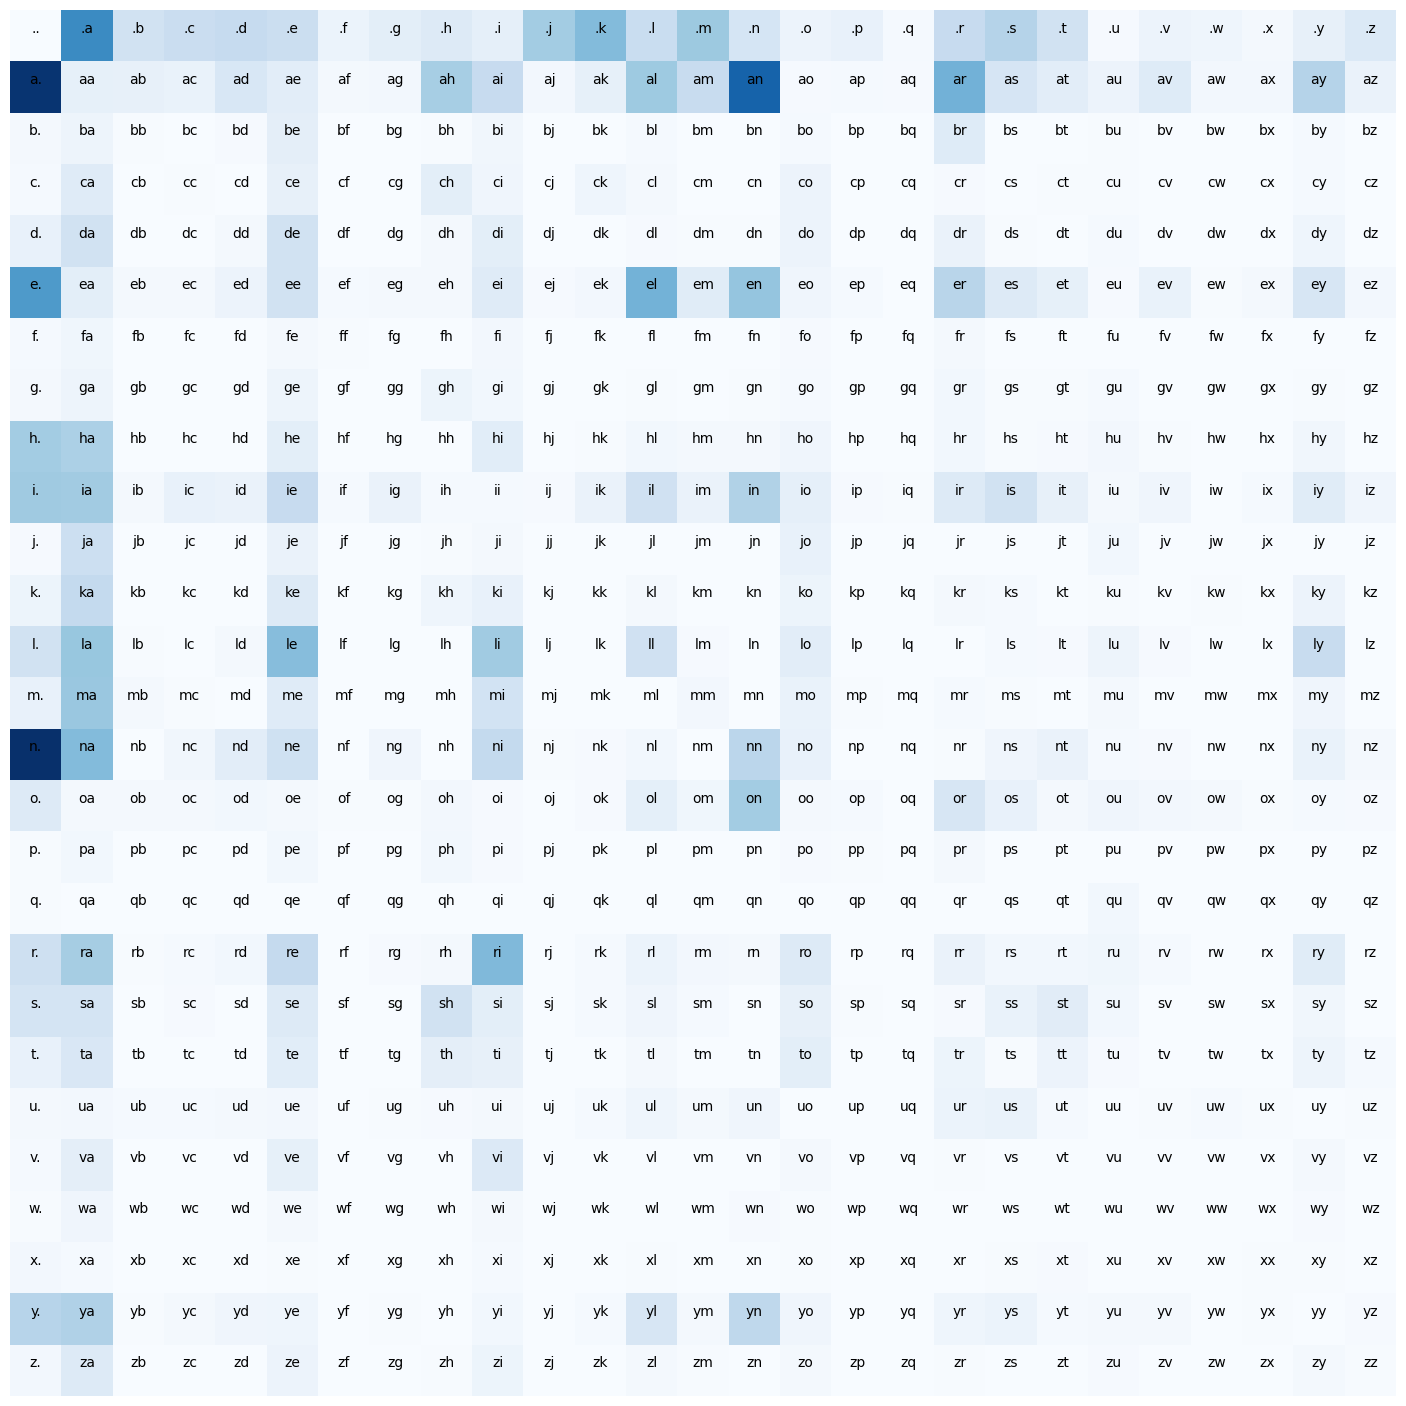

In [14]:
plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom')
        plt.text(j, i, N[i, j].item(), ha='center', va='top')
plt.axis('off')

In [28]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [51]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [52]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [53]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [57]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break

        print(''.join(out))

j
ju
jun
juni
junid
junide
j
ja
jan
jana
janas
janasa
janasah
p
c
co
con
cony
a
n
nn
k
ko
koh
kohi
kohin
t
to
tol
toli
tolia
tolian
j
ju
jue
juee
k
ks
ksa
ksah
ksahn
ksahna
ksahnaa
ksahnaau
ksahnaaur
ksahnaaura
ksahnaauran
ksahnaaurani
ksahnaauranil
ksahnaauranile
ksahnaauranilev
ksahnaauranilevi
ksahnaauranilevia
ksahnaauranilevias
d
de
ded
deda
dedai
dedain
dedainr
dedainrw
dedainrwi
dedainrwie
dedainrwiet
dedainrwieta
s
ss
sso
sson
ssoni
ssonie
ssoniel
ssoniely
ssonielyl
ssonielyla
ssonielylar
ssonielylart
ssonielylarte
f
fa
fav
fave
faveu
faveum
faveume
faveumer
faveumeri
faveumerif
faveumerifo
faveumerifon
faveumerifont
faveumerifontu
faveumerifontum
faveumerifontume
p
ph
phy
phyn
phyns
phynsl
phynsle
phynslen
phynslena
phynslenar
phynslenaru
phynslenarua
phynslenaruan
phynslenaruani
c
co
cor
core
y
ya
yae
yaen
yaeno
yaenon
k
ka
j
ja
jab
jabd
jabdi
jabdin
jabdine
jabdiner
jabdineri
jabdinerim
jabdinerimi
jabdinerimik
jabdinerimiki
jabdinerimikim
jabdinerimikima
jabdinerimikimay
ja